# Análise Exploratória do Dataset `car_price_dataset`
Este notebook explora o conjunto de dados de preços de carros do Kaggle, armazenado no banco `kaggle_data`.

**Passos que seguiremos:**
1. Carregamento dos dados 🚀
2. Exploração inicial 🔍
3. Estatísticas descritivas 📊
4. Limpeza e tratamento de dados 🛠
5. Visualizações 📈
6. Exportação dos dados limpos 💾


In [ ]:
# Selecionando o banco de dados Kaggle
spark.sql("USE kaggle_data")

# Carregando a tabela no PySpark DataFrame
df = spark.sql("SELECT * FROM kaggle_data.car_price_dataset")

# Exibir os primeiros registros
df.show(10)


+----------+--------+----+-----------+---------+--------------+-------+-----+-----------+-----+
|     Brand|   Model|Year|Engine_Size|Fuel_Type|  Transmission|Mileage|Doors|Owner_Count|Price|
+----------+--------+----+-----------+---------+--------------+-------+-----+-----------+-----+
|       Kia|     Rio|2020|        4.2|   Diesel|        Manual| 289944|    3|          5| 8501|
| Chevrolet|  Malibu|2012|        2.0|   Hybrid|     Automatic|   5356|    2|          3|12092|
|  Mercedes|     GLA|2020|        4.2|   Diesel|     Automatic| 231440|    4|          2|11171|
|      Audi|      Q5|2023|        2.0| Electric|        Manual| 160971|    2|          1|11780|
|Volkswagen|    Golf|2003|        2.6|   Hybrid|Semi-Automatic| 286618|    3|          3| 2867|
|    Toyota|   Camry|2007|        2.7|   Petrol|     Automatic| 157889|    4|          4| 7242|
|     Honda|   Civic|2010|        3.4| Electric|     Automatic| 139584|    3|          1|11208|
|       Kia|Sportage|2001|        4.7| E

In [ ]:
# Verificando a estrutura das colunas
df.printSchema()


root
 |-- Brand: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- Engine_Size: double (nullable = true)
 |-- Fuel_Type: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Mileage: long (nullable = true)
 |-- Doors: long (nullable = true)
 |-- Owner_Count: long (nullable = true)
 |-- Price: long (nullable = true)



In [ ]:
# Estatísticas descritivas do dataset
df.describe().show()


+-------+----------+--------+-----------------+------------------+---------+--------------+-----------------+------------------+------------------+------------------+
|summary|     Brand|   Model|             Year|       Engine_Size|Fuel_Type|  Transmission|          Mileage|             Doors|       Owner_Count|             Price|
+-------+----------+--------+-----------------+------------------+---------+--------------+-----------------+------------------+------------------+------------------+
|  count|     10000|   10000|            10000|             10000|    10000|         10000|            10000|             10000|             10000|             10000|
|   mean|      NULL|    NULL|        2011.5437|3.0005599999999966|     NULL|          NULL|      149239.1118|            3.4971|            2.9911|         8852.9644|
| stddev|      NULL|    NULL|6.897698756455915|1.1493240539456648|     NULL|          NULL|86322.34895733779|1.1100967622158642|1.4226816904421145|3112.5968102892334

In [ ]:
df.select("Price").summary("count", "min", "25%", "50%", "75%", "max").show()


+-------+-----+
|summary|Price|
+-------+-----+
|  count|10000|
|    min| 2000|
|    25%| 6644|
|    50%| 8858|
|    75%|11086|
|    max|18301|
+-------+-----+



In [ ]:
from pyspark.sql.functions import col, sum

# Contar valores nulos por coluna
df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()


+-----+-----+----+-----------+---------+------------+-------+-----+-----------+-----+
|Brand|Model|Year|Engine_Size|Fuel_Type|Transmission|Mileage|Doors|Owner_Count|Price|
+-----+-----+----+-----------+---------+------------+-------+-----+-----------+-----+
|    0|    0|   0|          0|        0|           0|      0|    0|          0|    0|
+-----+-----+----+-----------+---------+------------+-------+-----+-----------+-----+



In [ ]:
df = df.dropna()


In [ ]:
from pyspark.sql.types import IntegerType, DoubleType

df = df.withColumn("Year", df["Year"].cast(IntegerType()))
df = df.withColumn("Engine_Size", df["Engine_Size"].cast(DoubleType()))
df = df.withColumn("Mileage", df["Mileage"].cast(IntegerType()))
df = df.withColumn("Doors", df["Doors"].cast(IntegerType()))
df = df.withColumn("Owner_Count", df["Owner_Count"].cast(IntegerType()))
df = df.withColumn("Price", df["Price"].cast(DoubleType()))


In [ ]:
df.select("Year", "Engine_Size", "Mileage", "Doors", "Owner_Count", "Price").describe().show()


+-------+-----------------+------------------+-----------------+------------------+------------------+------------------+
|summary|             Year|       Engine_Size|          Mileage|             Doors|       Owner_Count|             Price|
+-------+-----------------+------------------+-----------------+------------------+------------------+------------------+
|  count|            10000|             10000|            10000|             10000|             10000|             10000|
|   mean|        2011.5437|3.0005599999999966|      149239.1118|            3.4971|            2.9911|         8852.9644|
| stddev|6.897698756455915|1.1493240539456648|86322.34895733779|1.1100967622158642|1.4226816904421145|3112.5968102892334|
|    min|             2000|               1.0|               25|                 2|                 1|            2000.0|
|    max|             2023|               5.0|           299947|                 5|                 5|           18301.0|
+-------+---------------

In [ ]:
df.select("Price").summary("count", "min", "25%", "50%", "75%", "max", "mean", "stddev").show()


+-------+------------------+
|summary|             Price|
+-------+------------------+
|  count|             10000|
|    min|            2000.0|
|    25%|            6644.0|
|    50%|            8858.0|
|    75%|           11086.0|
|    max|           18301.0|
|   mean|         8852.9644|
| stddev|3112.5968102892334|
+-------+------------------+



In [ ]:
df = df.fillna({"Engine_Size": 1.5, "Doors": 4, "Owner_Count": 1})


In [ ]:
df.groupBy("Year").count().orderBy("Year", ascending=False).show(10)


+----+-----+
|Year|count|
+----+-----+
|2023|  448|
|2022|  397|
|2021|  391|
|2020|  415|
|2019|  421|
|2018|  425|
|2017|  433|
|2016|  395|
|2015|  426|
|2014|  417|
+----+-----+
only showing top 10 rows


In [ ]:
df.groupBy("Year").avg("Price").orderBy("Year", ascending=False).show(10)


+----+------------------+
|Year|        avg(Price)|
+----+------------------+
|2023|12169.470982142857|
|2022|12067.690176322418|
|2021|11637.813299232737|
|2020|11495.284337349398|
|2019|11132.722090261283|
|2018| 10939.19294117647|
|2017|10343.757505773672|
|2016|           10177.6|
|2015| 9896.774647887323|
|2014| 9587.455635491608|
+----+------------------+
only showing top 10 rows


In [ ]:
df_pandas = df.toPandas()


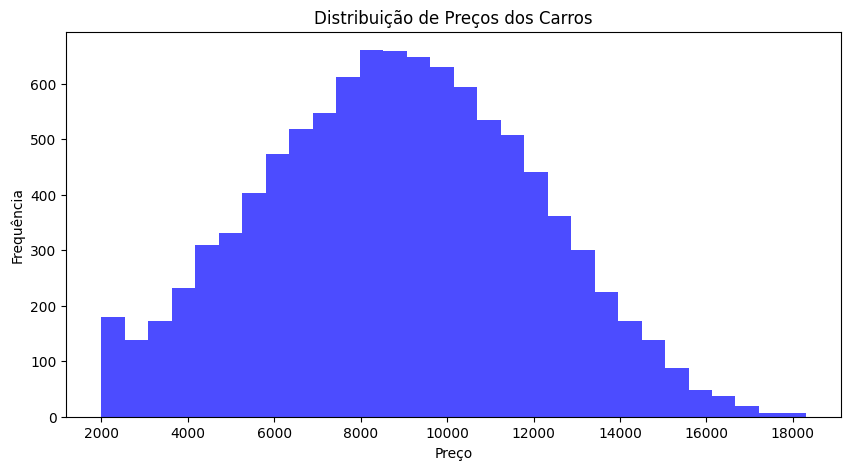

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_pandas["Price"], bins=30, color="blue", alpha=0.7)
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.title("Distribuição de Preços dos Carros")
plt.show()


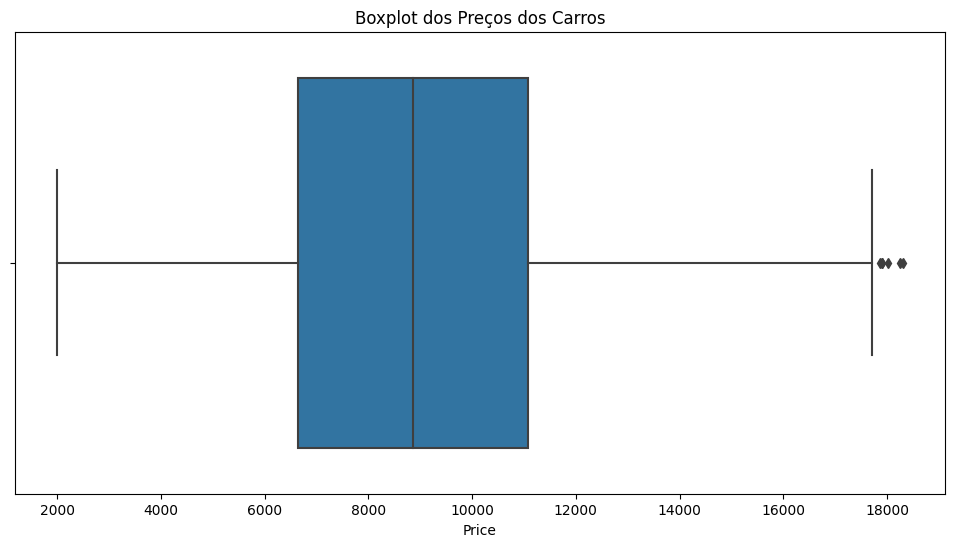

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x=df_pandas["Price"])
plt.title("Boxplot dos Preços dos Carros")
plt.show()


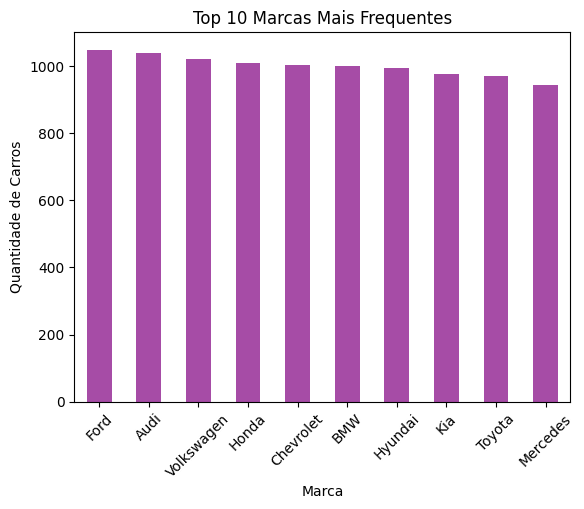

In [ ]:
df_pandas["Brand"].value_counts().head(10).plot(kind="bar", color="purple", alpha=0.7)
plt.xlabel("Marca")
plt.ylabel("Quantidade de Carros")
plt.title("Top 10 Marcas Mais Frequentes")
plt.xticks(rotation=45)
plt.show()


In [ ]:
Q1 = df_pandas["Price"].quantile(0.25)
Q3 = df_pandas["Price"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os dados sem outliers
df_limpo = df_pandas[(df_pandas["Price"] >= limite_inferior) & (df_pandas["Price"] <= limite_superior)]


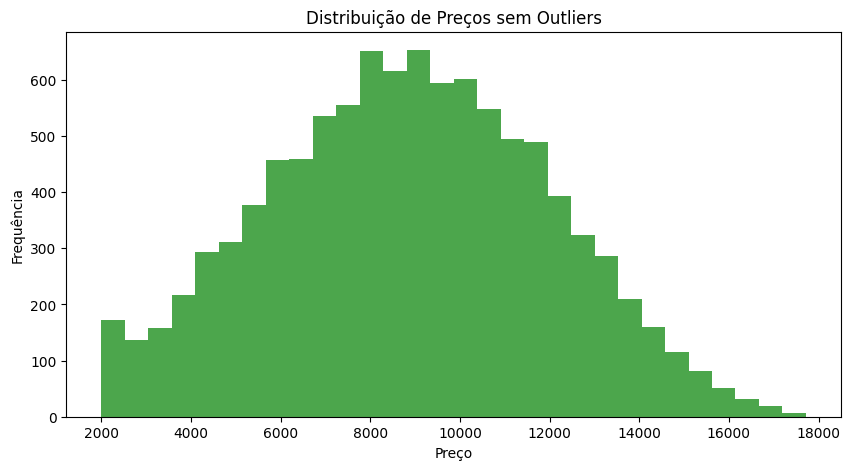

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df_limpo["Price"], bins=30, color="green", alpha=0.7)
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.title("Distribuição de Preços sem Outliers")
plt.show()


In [ ]:
# Visualizando os primeiros registros
df.show(5)

+----------+------+----+-----------+---------+--------------+-------+-----+-----------+-------+
|     Brand| Model|Year|Engine_Size|Fuel_Type|  Transmission|Mileage|Doors|Owner_Count|  Price|
+----------+------+----+-----------+---------+--------------+-------+-----+-----------+-------+
|       Kia|   Rio|2020|        4.2|   Diesel|        Manual| 289944|    3|          5| 8501.0|
| Chevrolet|Malibu|2012|        2.0|   Hybrid|     Automatic|   5356|    2|          3|12092.0|
|  Mercedes|   GLA|2020|        4.2|   Diesel|     Automatic| 231440|    4|          2|11171.0|
|      Audi|    Q5|2023|        2.0| Electric|        Manual| 160971|    2|          1|11780.0|
|Volkswagen|  Golf|2003|        2.6|   Hybrid|Semi-Automatic| 286618|    3|          3| 2867.0|
+----------+------+----+-----------+---------+--------------+-------+-----+-----------+-------+
only showing top 5 rows


In [ ]:
# Renomeando colunas para português
df = df.withColumnRenamed("Brand", "Marca") \
       .withColumnRenamed("Model", "Modelo") \
       .withColumnRenamed("Year", "Ano") \
       .withColumnRenamed("Engine_Size", "Tamanho_Motor") \
       .withColumnRenamed("Fuel_Type", "Tipo_Combustivel") \
       .withColumnRenamed("Transmission", "Transmissao") \
       .withColumnRenamed("Mileage", "Quilometragem") \
       .withColumnRenamed("Doors", "Portas") \
       .withColumnRenamed("Owner_Count", "Numero_Proprietarios") \
       .withColumnRenamed("Price", "Preco")

# Exibir as primeiras linhas com os novos nomes
df.show(5)


+----------+------+----+-------------+----------------+--------------+-------------+------+--------------------+-------+
|     Marca|Modelo| Ano|Tamanho_Motor|Tipo_Combustivel|   Transmissao|Quilometragem|Portas|Numero_Proprietarios|  Preco|
+----------+------+----+-------------+----------------+--------------+-------------+------+--------------------+-------+
|       Kia|   Rio|2020|          4.2|          Diesel|        Manual|       289944|     3|                   5| 8501.0|
| Chevrolet|Malibu|2012|          2.0|          Hybrid|     Automatic|         5356|     2|                   3|12092.0|
|  Mercedes|   GLA|2020|          4.2|          Diesel|     Automatic|       231440|     4|                   2|11171.0|
|      Audi|    Q5|2023|          2.0|        Electric|        Manual|       160971|     2|                   1|11780.0|
|Volkswagen|  Golf|2003|          2.6|          Hybrid|Semi-Automatic|       286618|     3|                   3| 2867.0|
+----------+------+----+--------

In [ ]:
from pyspark.sql.functions import corr

# Calculando correlação entre variáveis numéricas
df.select(
    corr("Ano", "Preco").alias("Corr_Ano_Preco"),
    corr("Tamanho_Motor", "Preco").alias("Corr_TamanhoMotor_Preco"),
    corr("Quilometragem", "Preco").alias("Corr_Quilometragem_Preco"),
    corr("Numero_Proprietarios", "Preco").alias("Corr_Proprietarios_Preco")
).show()


+------------------+-----------------------+------------------------+------------------------+
|    Corr_Ano_Preco|Corr_TamanhoMotor_Preco|Corr_Quilometragem_Preco|Corr_Proprietarios_Preco|
+------------------+-----------------------+------------------------+------------------------+
|0.6630358185023493|     0.3574034753558669|     -0.5512271827629027|    0.002656399406563...|
+------------------+-----------------------+------------------------+------------------------+



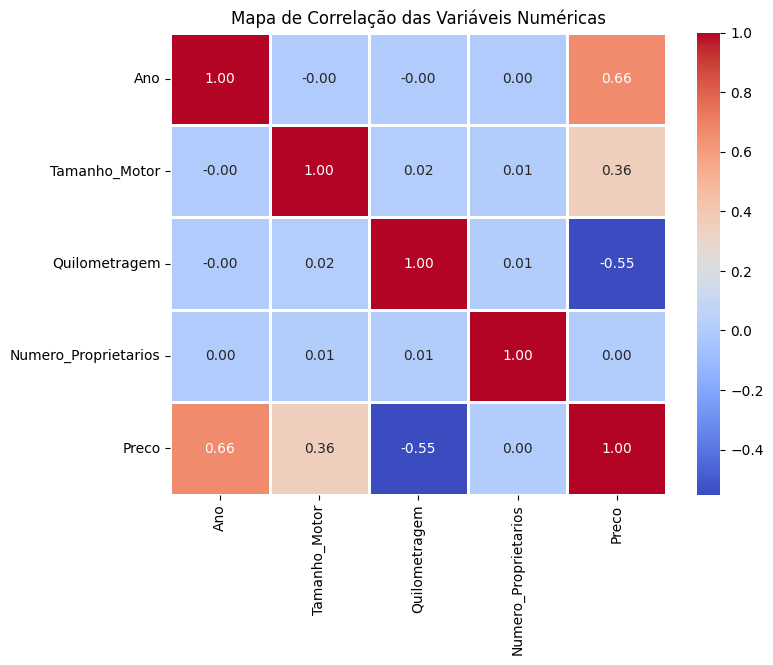

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertendo o dataframe do PySpark para Pandas
df_pandas = df.select("Ano", "Tamanho_Motor", "Quilometragem", "Numero_Proprietarios", "Preco").toPandas()

# Criando a matriz de correlação
correlacao = df_pandas.corr()

# Criando o heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Mapa de Correlação das Variáveis Numéricas")
plt.show()


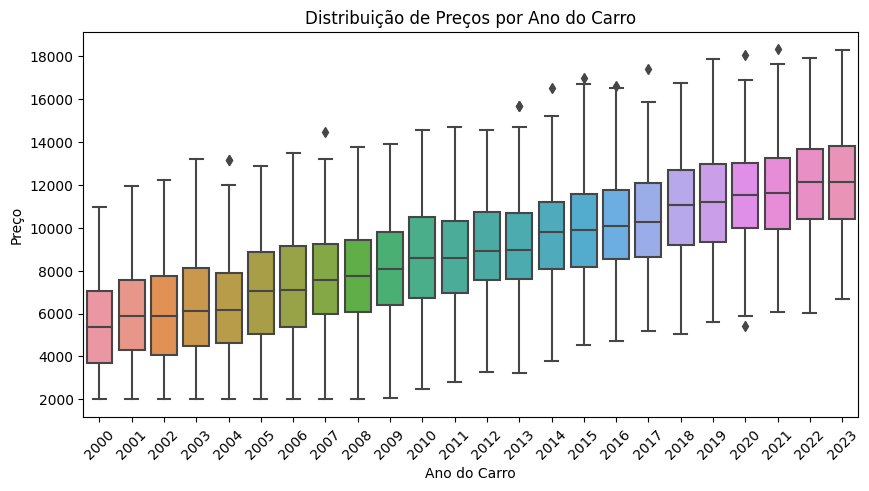

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_pandas["Ano"], y=df_pandas["Preco"])
plt.xticks(rotation=45)
plt.xlabel("Ano do Carro")
plt.ylabel("Preço")
plt.title("Distribuição de Preços por Ano do Carro")
plt.show()


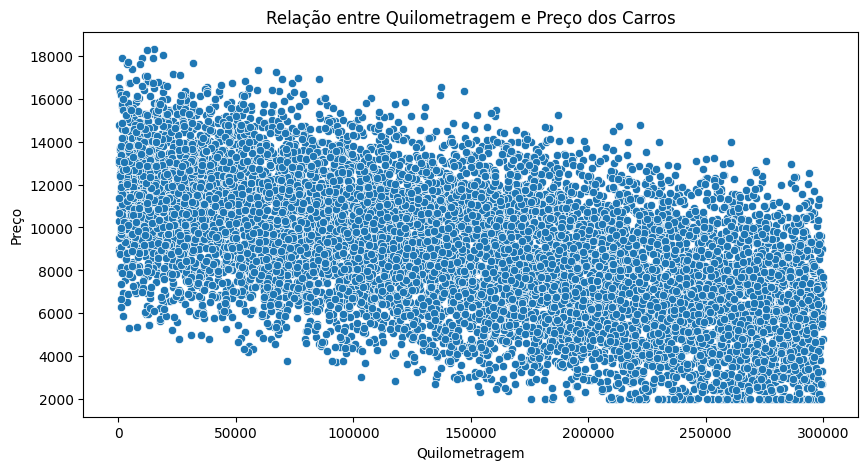

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_pandas["Quilometragem"], y=df_pandas["Preco"])
plt.xlabel("Quilometragem")
plt.ylabel("Preço")
plt.title("Relação entre Quilometragem e Preço dos Carros")
plt.show()


In [ ]:
print(df.columns)


['Marca', 'Modelo', 'Ano', 'Tamanho_Motor', 'Tipo_Combustivel', 'Transmissao', 'Quilometragem', 'Portas', 'Numero_Proprietarios', 'Preco']


In [ ]:
df_pandas = df.toPandas()
print(df_pandas.columns)


Index(['Marca', 'Modelo', 'Ano', 'Tamanho_Motor', 'Tipo_Combustivel',
       'Transmissao', 'Quilometragem', 'Portas', 'Numero_Proprietarios',
       'Preco'],
      dtype='object')


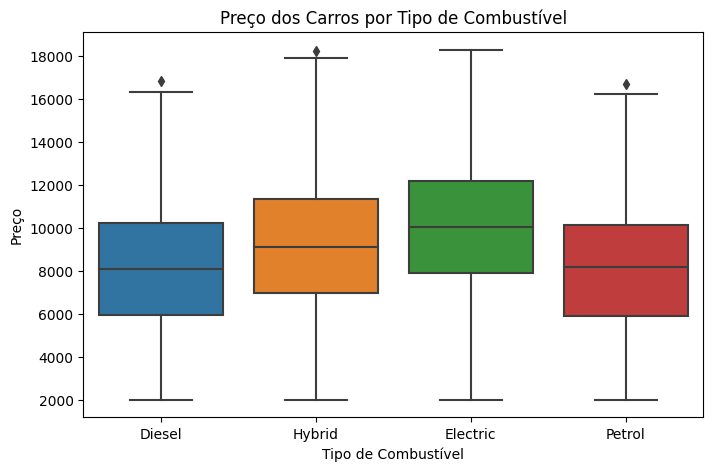

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=df_pandas["Tipo_Combustivel"], y=df_pandas["Preco"])
plt.xlabel("Tipo de Combustível")
plt.ylabel("Preço")
plt.title("Preço dos Carros por Tipo de Combustível")
plt.show()


## 📊 Análise Gráfica: Preço dos Carros por Tipo de Combustível

O gráfico abaixo mostra a distribuição dos preços dos carros de acordo com o tipo de combustível utilizado.

### 🔹 Observações e Análise

1️⃣ **Média e Mediana dos Preços**  
   - Carros elétricos (**Electric**) possuem **mediana** de preço **mais alta** em comparação com outros tipos de combustível.  
   - Os veículos híbridos (**Hybrid**) e a diesel (**Diesel**) apresentam medianas **similares**, mas um pouco abaixo dos elétricos.  
   - Carros a gasolina (**Petrol**) têm a **mediana mais baixa** entre todas as categorias.

2️⃣ **Distribuição de Preços**  
   - O intervalo interquartil (caixa do boxplot) mostra que a **variação dos preços dos veículos elétricos é maior** do que nos outros combustíveis.  
   - Carros a gasolina (**Petrol**) e diesel (**Diesel**) possuem **distribuições semelhantes**, com preços variando entre **2.000 e 16.000**.

3️⃣ **Outliers**  
   - Existem alguns **outliers acima da faixa esperada**, especialmente em todas as categorias.  
   - Isso pode indicar que existem **modelos premium** (luxo) de carros em cada categoria, que têm preços significativamente mais altos do que a média.

### 📌 Conclusão
- **Carros elétricos tendem a ser mais caros**, com maior variação nos preços.  
- **Carros a gasolina e diesel apresentam preços mais estáveis**, sendo opções mais acessíveis.  
- **A presença de outliers** indica que existem veículos de luxo em todas as categorias de combustível.  




##  Passos para Previsão do Preço dos Carros

### 1️⃣ Seleção de Variáveis  
As principais variáveis para prever o preço do carro são:  
- **Ano do Carro** → Modelos mais novos tendem a ser mais caros.  
- **Tamanho do Motor** → Motores maiores podem elevar o preço.  
- **Quilometragem** → Maior quilometragem reduz o valor.  
- **Número de Proprietários** → Muitos donos podem diminuir o preço.  
- **Tipo de Combustível** → Elétricos e híbridos são geralmente mais caros.  
- **Transmissão** → Automáticos tendem a custar mais.  

---

### 2️⃣ Perguntas-Chave para Predição  
1. **Como a idade do carro afeta o preço?**  
2. **Qual a relação entre quilometragem e preço?**  
3. **O tipo de combustível influencia no valor do carro?**  

---

### 3️⃣ Próximos Passos  
1. **Preparar os dados** (tratamento e normalização).  
2. **Dividir conjunto de treino e teste**.  
3. **Treinar um modelo (Regressão Linear, Random Forest, etc.)**.  
4. **Validar e interpretar os resultados**.  

Agora podemos seguir para a modelagem! 🚀  


In [ ]:
from pyspark.sql.functions import col

# Selecionando as colunas necessárias para a predição
df = df.select(
    col("Ano"),
    col("Tamanho_Motor"),
    col("Quilometragem"),
    col("Numero_Proprietarios"),
    col("Tipo_Combustivel"),
    col("Transmissao"),
    col("Preco")
)

# Exibir as primeiras linhas
df.show(5)


+----+-------------+-------------+--------------------+----------------+--------------+-------+
| Ano|Tamanho_Motor|Quilometragem|Numero_Proprietarios|Tipo_Combustivel|   Transmissao|  Preco|
+----+-------------+-------------+--------------------+----------------+--------------+-------+
|2020|          4.2|       289944|                   5|          Diesel|        Manual| 8501.0|
|2012|          2.0|         5356|                   3|          Hybrid|     Automatic|12092.0|
|2020|          4.2|       231440|                   2|          Diesel|     Automatic|11171.0|
|2023|          2.0|       160971|                   1|        Electric|        Manual|11780.0|
|2003|          2.6|       286618|                   3|          Hybrid|Semi-Automatic| 2867.0|
+----+-------------+-------------+--------------------+----------------+--------------+-------+
only showing top 5 rows


In [ ]:
print(df.columns)


['Ano', 'Tamanho_Motor', 'Quilometragem', 'Numero_Proprietarios', 'Tipo_Combustivel', 'Transmissao', 'Preco']


In [ ]:
from pyspark.sql.functions import col

df.select([col("Tipo_Combustivel")]).summary("count", "min", "max").show()


+-------+----------------+
|summary|Tipo_Combustivel|
+-------+----------------+
|  count|           10000|
|    min|          Diesel|
|    max|          Petrol|
+-------+----------------+



In [ ]:
df = df.fillna({"Tipo_Combustivel": "Desconhecido"})


In [ ]:
df = df.withColumn("Tipo_Combustivel", col("Tipo_Combustivel").cast("string"))


In [ ]:
df.select("Tipo_Combustivel").distinct().show()


+----------------+
|Tipo_Combustivel|
+----------------+
|          Petrol|
|          Diesel|
|        Electric|
|          Hybrid|
+----------------+



In [ ]:
from pyspark.sql.functions import col, count

df.select([count(col("Tipo_Combustivel"))]).show()


+-----------------------+
|count(Tipo_Combustivel)|
+-----------------------+
|                  10000|
+-----------------------+



In [ ]:
from pyspark.sql.functions import trim

df = df.withColumn("Tipo_Combustivel", trim(col("Tipo_Combustivel")))


In [ ]:
df.select("Tipo_Combustivel").distinct().show(truncate=False)


+----------------+
|Tipo_Combustivel|
+----------------+
|Petrol          |
|Diesel          |
|Electric        |
|Hybrid          |
+----------------+



In [ ]:
df.printSchema()


root
 |-- Ano: integer (nullable = true)
 |-- Tamanho_Motor: double (nullable = false)
 |-- Quilometragem: integer (nullable = true)
 |-- Numero_Proprietarios: integer (nullable = false)
 |-- Tipo_Combustivel: string (nullable = false)
 |-- Transmissao: string (nullable = true)
 |-- Preco: double (nullable = true)



In [ ]:
from pyspark.sql.functions import trim, when

df = df.withColumn("Tipo_Combustivel", trim(col("Tipo_Combustivel")))

df = df.withColumn("Tipo_Combustivel", when(col("Tipo_Combustivel") == "", "Desconhecido").otherwise(col("Tipo_Combustivel")))


In [ ]:
df.select("Tipo_Combustivel").distinct().show(truncate=False)


+----------------+
|Tipo_Combustivel|
+----------------+
|Petrol          |
|Diesel          |
|Electric        |
|Hybrid          |
+----------------+



In [ ]:
from pyspark.sql.functions import when

df = df.withColumn(
    "Tipo_Combustivel_Idx",
    when(col("Tipo_Combustivel") == "Petrol", 0)
    .when(col("Tipo_Combustivel") == "Diesel", 1)
    .when(col("Tipo_Combustivel") == "Electric", 2)
    .when(col("Tipo_Combustivel") == "Hybrid", 3)
    .otherwise(4)  # Para valores desconhecidos
)

# Exibir os primeiros registros
df.select("Tipo_Combustivel", "Tipo_Combustivel_Idx").show(5)


+----------------+--------------------+
|Tipo_Combustivel|Tipo_Combustivel_Idx|
+----------------+--------------------+
|          Diesel|                   1|
|          Hybrid|                   3|
|          Diesel|                   1|
|        Electric|                   2|
|          Hybrid|                   3|
+----------------+--------------------+
only showing top 5 rows


In [ ]:
df = df.drop("Tipo_Combustivel", "Transmissao")

# Exibir as colunas finais
print(df.columns)


['Ano', 'Tamanho_Motor', 'Quilometragem', 'Numero_Proprietarios', 'Preco', 'Tipo_Combustivel_Idx']


In [ ]:
# Dividir o conjunto de dados
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

print(f"Tamanho do conjunto de treino: {train_df.count()} registros")
print(f"Tamanho do conjunto de teste: {test_df.count()} registros")


Tamanho do conjunto de treino: 7950 registros
Tamanho do conjunto de teste: 2050 registros
